In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import sys
import os
import torch

In [136]:
ENERGY_PATH = "data/energy/"
WEATHER_PATH = "data/weather/Weather_Data_Germany.csv"

weather_data = pd.read_csv(WEATHER_PATH, sep=",")
weather_data.head()


,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
0,5.8,54.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-2.766602,102439.914,766.03015,0.304399,11.806978,2.823900,282.04110,0.0,0.0,0.0,0.0,0.000860,15.666069,3.153420
1,5.8,53.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-6.159180,102795.230,842.93190,0.945699,6.628730,1.767059,281.28223,0.0,0.0,0.0,0.0,0.254992,10.824787,2.401394
2,5.8,52.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,478.410160,103077.450,862.93030,0.999504,4.976940,1.899902,280.48530,0.0,0.0,0.0,0.0,0.439765,8.450895,2.586425
3,5.8,51.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,237.821290,103310.510,619.56150,0.999992,3.810944,1.201527,280.26593,0.0,0.0,0.0,0.0,0.645616,6.853557,1.614200
4,5.8,50.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,4681.780000,103456.680,385.46838,0.999992,3.689941,-0.424220,277.94235,0.0,0.0,0.0,0.0,0.361133,6.055728,-0.896704


In [88]:
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%d %H:%M:%S')
weather_data['forecast_origin'] = pd.to_datetime(weather_data['forecast_origin'], format='%Y-%m-%d %H:%M:%S')


march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
weather_data[weather_data['time'].dt.date.isin(march_2019.date)].head(30)

,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
170880,5.8,54.2,2019-03-31,2019-03-31,0.0,-2.766602,102285.125,632.740970,0.795102,0.800737,-5.973744,280.07993,0.0,0.0,0.0,1.862645e-09,0.000135,0.823895,-7.284009
170881,5.8,53.2,2019-03-31,2019-03-31,0.0,-6.159180,102259.190,319.270020,0.999885,-0.540272,-2.965883,279.85000,0.0,0.0,0.0,1.862645e-09,0.253795,-1.349788,-5.887979
170882,5.8,52.2,2019-03-31,2019-03-31,0.0,478.410160,102208.430,130.781980,0.065555,-0.605140,-2.433466,279.54306,0.0,0.0,0.0,1.862645e-09,0.432109,-1.956108,-5.222606
170883,5.8,51.2,2019-03-31,2019-03-31,0.0,237.821290,102103.086,55.620728,0.788540,-0.918568,-1.386455,282.18182,0.0,0.0,0.0,1.862645e-09,0.646898,-2.882642,-2.754381
170884,5.8,50.2,2019-03-31,2019-03-31,0.0,4681.780000,102084.164,34.530273,0.010743,-2.155909,-0.939234,278.06440,0.0,0.0,0.0,1.862645e-09,0.352781,-3.277893,-1.858857
170885,5.8,49.2,2019-03-31,2019-03-31,0.0,2131.713000,102054.710,22.874023,0.147240,-1.559063,-0.266306,278.54132,0.0,0.0,0.0,1.862645e-09,0.265545,-0.475419,0.926195
170886,5.8,48.2,2019-03-31,2019-03-31,0.0,3675.888700,102027.700,32.620117,0.000000,-1.130146,1.936767,280.39346,0.0,0.0,0.0,1.862645e-09,0.885801,-1.108223,3.681002
170887,5.8,47.2,2019-03-31,2019-03-31,0.0,2585.749000,102077.270,29.228516,0.018983,-1.211686,1.281403,279.43180,0.0,0.0,0.0,1.862645e-09,0.826354,-0.708959,2.762241
170888,6.8,54.2,2019-03-31,2019-03-31,0.0,1.756836,102212.560,638.978400,0.802396,1.705555,-6.296184,280.27716,0.0,0.0,0.0,1.862645e-09,0.000135,1.837906,-7.336752
170889,6.8,53.2,2019-03-31,2019-03-31,0.0,-19.729492,102226.040,210.036620,0.641910,0.707376,-2.433990,278.56390,0.0,0.0,0.0,1.862645e-09,0.329392,0.805437,-5.495911


,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
0,5.8,54.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-2.766602,102439.914,766.03015,0.304399,11.806978,2.823900,282.04110,0.0,0.0,0.0,0.0,0.000860,15.666069,3.153420
1,5.8,53.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-6.159180,102795.230,842.93190,0.945699,6.628730,1.767059,281.28223,0.0,0.0,0.0,0.0,0.254992,10.824787,2.401394
2,5.8,52.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,478.410160,103077.450,862.93030,0.999504,4.976940,1.899902,280.48530,0.0,0.0,0.0,0.0,0.439765,8.450895,2.586425
3,5.8,51.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,237.821290,103310.510,619.56150,0.999992,3.810944,1.201527,280.26593,0.0,0.0,0.0,0.0,0.645616,6.853557,1.614200
4,5.8,50.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,4681.780000,103456.680,385.46838,0.999992,3.689941,-0.424220,277.94235,0.0,0.0,0.0,0.0,0.361133,6.055728,-0.896704


In [78]:
# number of weather stations   
print("Number of unique longitude-latitude pairs: ", weather_data.groupby(["longitude", "latitude"]).ngroups)

Number of unique longitude-latitude pairs:  80


In [4]:
# average data per hour
avg_per_h = weather_data.groupby(['time']).mean(numeric_only=True).reset_index()
avg_per_h.head()





,time,longitude,latitude,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
0,2019-01-01 00:00:00,10.3,50.7,0.0,3360.296561,103009.967750,507.635043,0.966562,3.867164,1.065368,278.216013,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055
1,2019-01-01 01:00:00,10.3,50.7,0.0,3360.296561,102964.489612,544.627164,0.959348,4.092345,1.116217,278.310794,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379
2,2019-01-01 02:00:00,10.3,50.7,0.0,3360.296561,102908.208325,575.103757,0.966846,4.320050,1.223478,278.206292,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783
3,2019-01-01 03:00:00,10.3,50.7,0.0,3360.296561,102827.034387,612.314609,0.979125,4.638074,1.222571,278.140331,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984
4,2019-01-01 04:00:00,10.3,50.7,0.0,3360.296561,102725.913987,660.112603,0.981526,4.980449,1.055763,278.102989,0.0,0.0,0.0,0.000135,0.742255,8.147790,1.289936


In [5]:
#column where t2m is converted to celsius from kelvin
avg_per_h['t2m_C'] = avg_per_h['t2m'] - 273.15

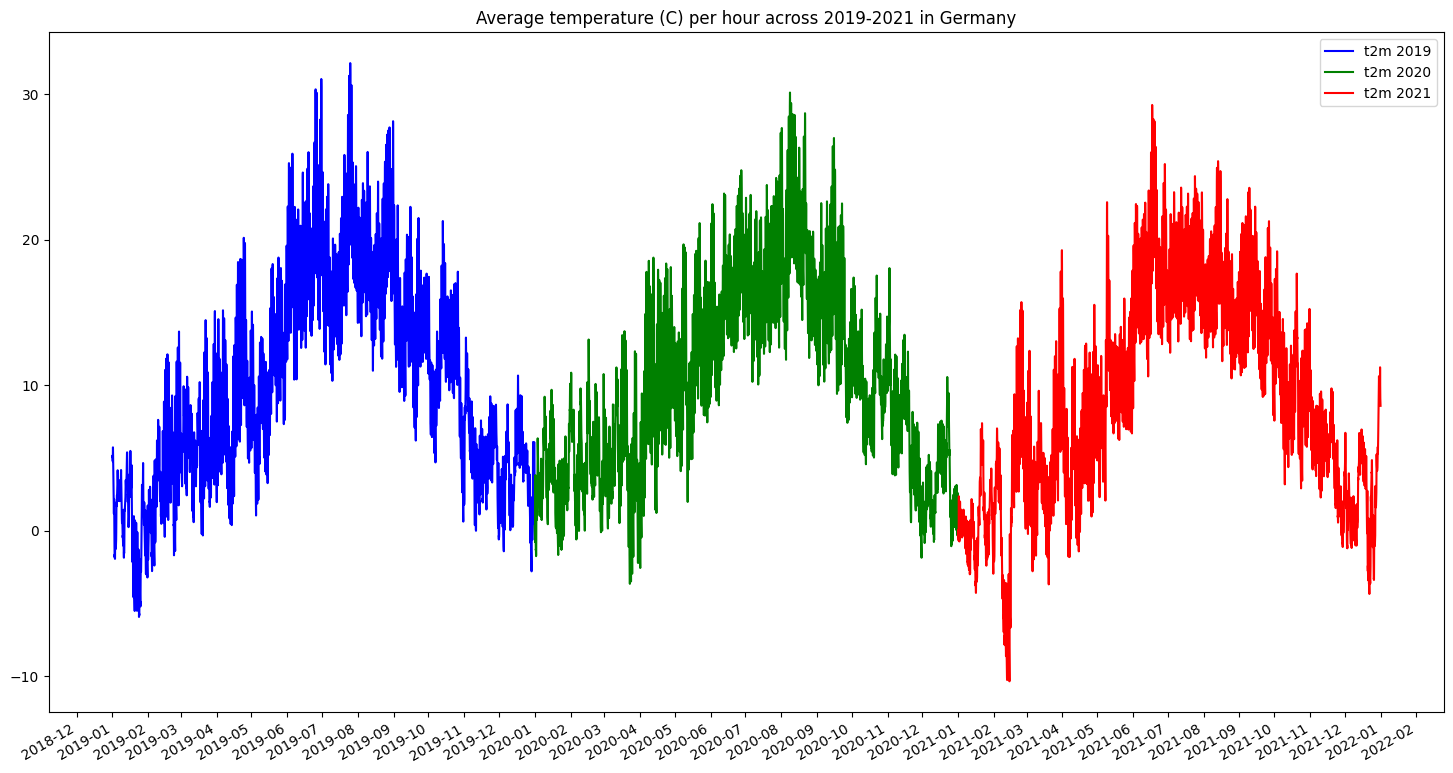

In [71]:
#plot ssr and t2m for each year separately
# add ticks on x axis for 
import matplotlib.dates as mdates

avg_per_h['time'] = pd.to_datetime(avg_per_h['time'])  # Make sure 'time' is in datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles if you want distinct appearances
colors = ['blue', 'green', 'red']
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = avg_per_h[avg_per_h['time'].dt.year == year]
    
    # Plot each year's data
    plt.plot(year_data['time'], year_data['t2m_C'], label=f't2m {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Average temperature (C) per hour across 2019-2021 in Germany")
plt.show()

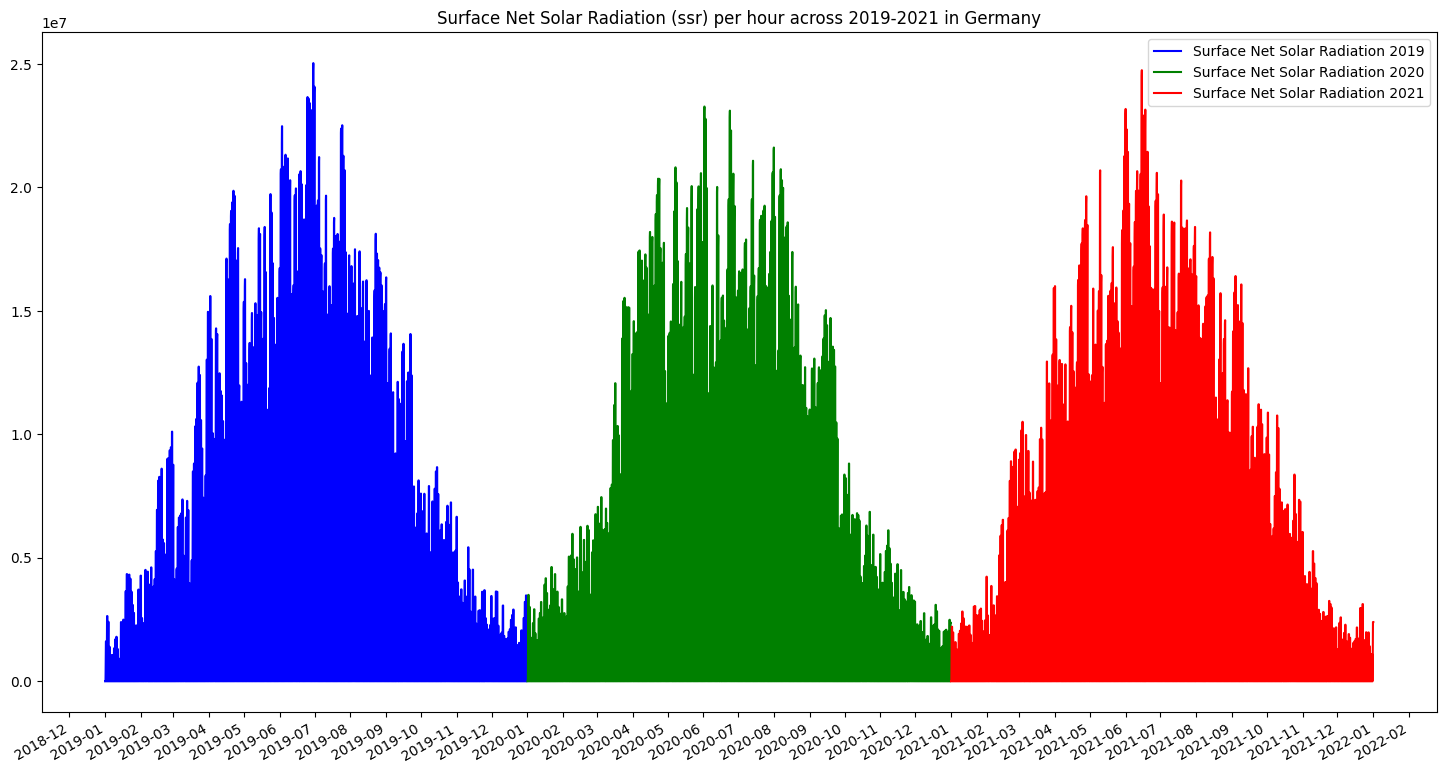

In [70]:
#same as above but for srr
avg_per_h['time'] = pd.to_datetime(avg_per_h['time'])  # Convert 'time' to datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles for visual distinction
colors = ['blue', 'green', 'red']  # Different colors for each year
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = avg_per_h[avg_per_h['time'].dt.year == year]
    
    # Plot 'srr' data for each year
    plt.plot(year_data['time'], year_data['ssr'], label=f'Surface Net Solar Radiation {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Surface Net Solar Radiation (ssr) per hour across 2019-2021 in Germany")
plt.show()

In [8]:
# find most significant variables in data for solar energy prediction / wind energy prediction
# normalize data + further pre processing
# build model
# train small train split for debugging
# train entire model
# finde tune hyperparameters with validation set    
# test model on test set

In [9]:
demand_data = pd.read_csv(ENERGY_PATH + "Reaslised_Demand_Germany.csv", sep=";")
demand_data.head()

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
0,01.01.19 00:00,01.01.19 00:15,"10.982,75","5.349,25","456,75"
1,01.01.19 00:15,01.01.19 00:30,"10.864,75","5.040,50","333,75"
2,01.01.19 00:30,01.01.19 00:45,"10.737,75","4.732,50",280
3,01.01.19 00:45,01.01.19 01:00,"10.680,25","4.617,50","304,5"
4,01.01.19 01:00,01.01.19 01:15,"10.599,00","4.485,00","249,75"


In [10]:
supply_data = pd.read_csv(ENERGY_PATH + "Realised_Supply_Germany.csv", sep=";")
supply_data.head()

,Date from,Date to,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW]
0,01.01.19 00:00,01.01.19 00:15,"1.199,00",401,"794,25","4.839,25",0,"31,5","2.250,50","1.733,00","836,25","850,5","87,5","431,75"
1,01.01.19 00:15,01.01.19 00:30,"1.203,00","394,75","793,5","5.030,75",0,"31,5","2.263,25","1.587,75","729,5","821,5","99,25","429,75"
2,01.01.19 00:30,01.01.19 00:45,"1.204,50","381,25","791,75","5.213,50",0,"31,5","2.246,00","1.555,25","648,5","804,75",44,"431,25"
3,01.01.19 00:45,01.01.19 01:00,"1.208,75",381,"754,5","5.308,25",0,"31,5","2.241,75","1.459,00","597,5","796,5",41,"431,5"
4,01.01.19 01:00,01.01.19 01:15,"1.204,50","388,25","715,5","5.398,50",0,"31,5","2.224,50","1.367,75","610,5","765,5",21,"429,25"


In [11]:
import pytz
# find time shift from winter to summer time in demand data "Date from" key
demand_data['Date from'] = pd.to_datetime(demand_data['Date from'],)
demand_data['Date to'] = pd.to_datetime(demand_data['Date to'])
supply_data['Date from'] = pd.to_datetime(supply_data['Date from'])
supply_data['Date to'] = pd.to_datetime(supply_data['Date to'])
demand_data.head()
supply_data.head()
# convert to CET



,Date from,Date to,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW]
0,2019-01-01 00:00:00,2019-01-01 00:15:00,"1.199,00",401,"794,25","4.839,25",0,"31,5","2.250,50","1.733,00","836,25","850,5","87,5","431,75"
1,2019-01-01 00:15:00,2019-01-01 00:30:00,"1.203,00","394,75","793,5","5.030,75",0,"31,5","2.263,25","1.587,75","729,5","821,5","99,25","429,75"
2,2019-01-01 00:30:00,2019-01-01 00:45:00,"1.204,50","381,25","791,75","5.213,50",0,"31,5","2.246,00","1.555,25","648,5","804,75",44,"431,25"
3,2019-01-01 00:45:00,2019-01-01 01:00:00,"1.208,75",381,"754,5","5.308,25",0,"31,5","2.241,75","1.459,00","597,5","796,5",41,"431,5"
4,2019-01-01 01:00:00,2019-01-01 01:15:00,"1.204,50","388,25","715,5","5.398,50",0,"31,5","2.224,50","1.367,75","610,5","765,5",21,"429,25"


In [79]:
# get all days of march in 2019
march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
# show all instances in demanddata
demand_data[demand_data['Date from'].dt.date.isin(march_2019.date)].head(50)

#demand_data[demand_data['Date from'].dt.date.isin(october_2019.date)].head(50)

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
8544,2019-03-31 00:00:00,2019-03-31 00:15:00,"10.918,25","8.702,25","321,5"
8545,2019-03-31 00:15:00,2019-03-31 00:30:00,"10.817,00","8.551,25",339
8546,2019-03-31 00:30:00,2019-03-31 00:45:00,"10.624,50","8.285,00","444,5"
8547,2019-03-31 00:45:00,2019-03-31 01:00:00,"10.538,25","8.134,75","656,5"
8548,2019-03-31 01:00:00,2019-03-31 01:15:00,"10.436,00","8.041,50","425,25"
8549,2019-03-31 01:15:00,2019-03-31 01:30:00,"10.321,50","7.914,25",499
8550,2019-03-31 01:30:00,2019-03-31 01:45:00,"10.262,25","7.832,00","563,25"
8551,2019-03-31 01:45:00,2019-03-30 02:00:00,"7.354,50","4.910,75","672,25"
8552,2019-03-31 03:00:00,2019-03-31 03:15:00,"10.128,75","7.773,25","669,5"
8553,2019-03-31 03:15:00,2019-03-31 03:30:00,"10.123,25","7.659,00","712,5"


In [12]:
#only use data until the end of 2021
demand_data_train = demand_data[demand_data['Date from'] < '2022-01-01']
supply_data_train = supply_data[supply_data['Date from'] < '2022-01-01']
demand_data_train.tail()



,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
105211,2021-12-31 22:45:00,2021-12-31 23:00:00,"11.656,00","3.512,50",112
105212,2021-12-31 23:00:00,2021-12-31 23:15:00,"11.583,50","3.457,00","571,5"
105213,2021-12-31 23:15:00,2021-12-31 23:30:00,"11.468,75","3.463,25","711,75"
105214,2021-12-31 23:30:00,2021-12-31 23:45:00,"11.359,75","3.359,50",693
105215,2021-12-31 23:45:00,2022-01-01 00:00:00,"11.205,00","3.226,25",756


In [56]:
def clean_convert_to_float(x):
    if not isinstance(x, str):
        return x
    x = x.replace('.', '').replace(',', '.')
    try:
        return float(x)
    except ValueError:
        return x
    

demand_data_train.iloc[:, 2:] = demand_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


C:\Users\belau\AppData\Local\Temp\ipykernel_8992\2092485837.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_data_train.iloc[:, 2:] = demand_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


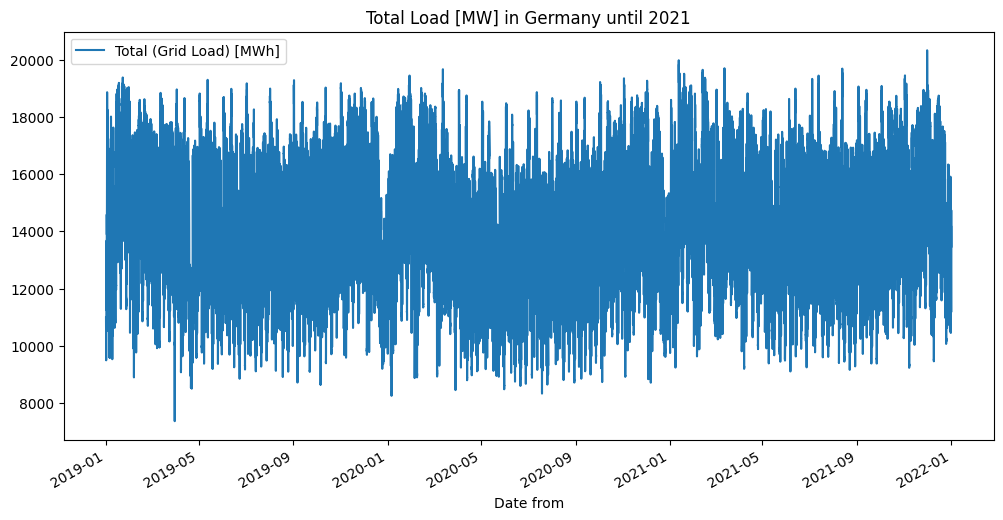

In [65]:


demand_data_train.plot(figsize=(12, 6), x='Date from', y='Total (Grid Load) [MWh]')
plt.title("Total Load [MW] in Germany until 2021")
plt.show()

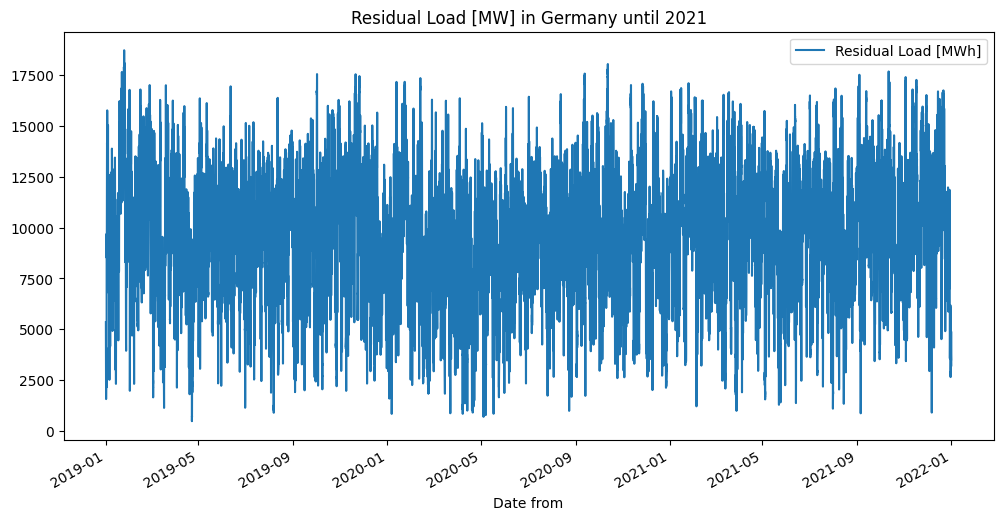

In [64]:
demand_data_train.plot(figsize=(12, 6), x='Date from', y='Residual Load [MWh]')
plt.title("Residual Load [MW] in Germany until 2021")
plt.show()

In [45]:

#fix typo in column name for wind offshore
supply_data_train.rename(columns={'Wind Offshore [MW] ': 'Wind Offshore [MW]'}, inplace=True)
supply_data_train.columns.values

C:\Users\belau\AppData\Local\Temp\ipykernel_8992\3607634537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train.rename(columns={'Wind Offshore [MWh]': 'Wind Offshore [MW]'}, inplace=True)


array(['Date from', 'Date to', 'Biomass [MW]', 'Hydro Power [MW]',
       'Wind Offshore [MW]', 'Wind Onshore [MW]', 'Photovoltaic [MW]',
       'Other Renewable [MW]', 'Nuclear Power [MW]', 'Lignite [MW]',
       'Coal [MW]', 'Natural Gas [MW]', 'Pumped Storage [MW]',
       'Other Conventional [MW]', 'Wind total [MW]'], dtype=object)

In [57]:
supply_data_train.iloc[:, 2:] = supply_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
supply_data_train["Wind total [MW]"] = supply_data_train[["Wind Offshore [MW]","Wind Onshore [MW]"]].sum( axis=1)
# make sure it is float
supply_data_train["Wind total [MW]"].head()

C:\Users\belau\AppData\Local\Temp\ipykernel_8992\69185201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train.iloc[:, 2:] = supply_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
C:\Users\belau\AppData\Local\Temp\ipykernel_8992\69185201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train["Wind total [MW]"] = supply_data_train[["Wind Offshore [MW]","Wind Onshore [MW]"]].sum( axis=1)


0    5633.50
1    5824.25
2    6005.25
3    6062.75
4    6114.00
Name: Wind total [MW], dtype: float64

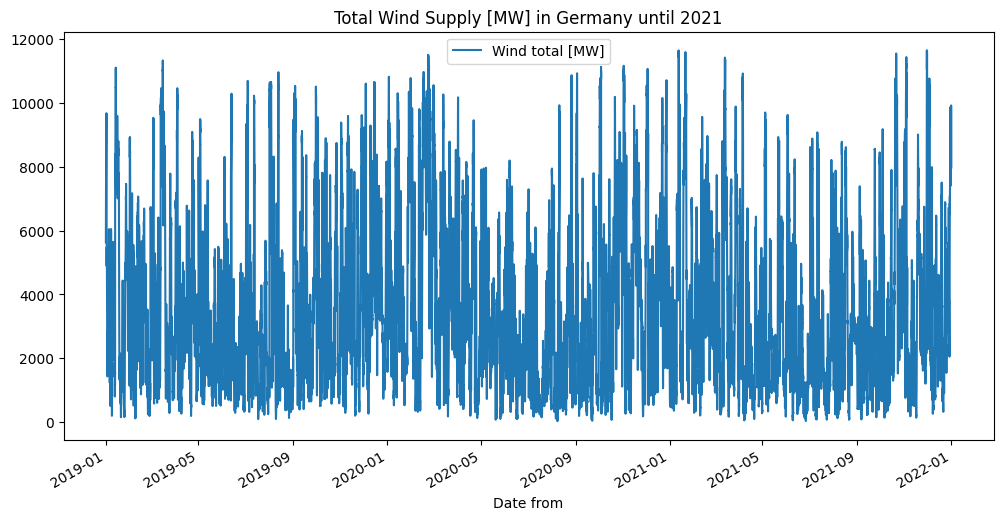

In [63]:
# plot total wind supply and photovoltaic supply
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Wind total [MW]')
plt.title("Total Wind Supply [MW] in Germany until 2021")
plt.show()


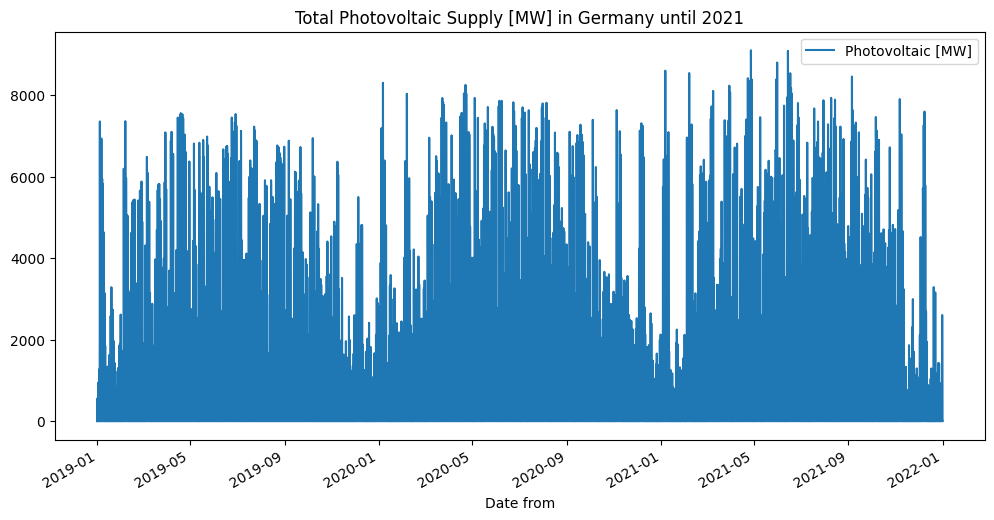

In [74]:
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Photovoltaic [MW]')
plt.title("Total Photovoltaic Supply [MW] in Germany until 2021")
plt.show()


In [73]:
#find columns with missing values
missing_demand = demand_data_train.isnull().sum()
missing_supply = supply_data_train.isnull().sum()
missing_demand[missing_demand > 0]
missing_supply[missing_supply > 0]


Series([], dtype: int64)

In [ ]:
# remove seasonality from demand and supply data
